### Trabajo práctico N° 2: Experimentación
INTEGRANTES:
<ul>
    <li>Agustín Aguilar</li>
    <li>Nicolás Ferrari</li>
    <li>Emiliano Sosa</li>
</ul>
Vamos a intentar predecir si un boxeador va a ganar una pelea a partir de ciertos datos.
En principio nuestro conjunto de datos lucía de la siguiente manera:

<table width="100%">
  <tr>
    <th>Nombre variable</th>
    <th>Descripción</th>
    <th>Valores Posibles</th>
  </tr>
  <tr>
    <td>age_A y age_B</td>
    <td>Edad del boxeador a y b</td>
    <td>en años</td>
  </tr>
  <tr>
    <td>height_A y height_B</td>
    <td>Altura del boxeador a y b</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>reach_A y reach_b</td>
    <td>Distancia de una mano a la otra con los brazos estirados</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>stance_A y stance_B</td>
    <td>Postura de los boxeadores</td>
    <td>orthodox/southpaw</td>
  </tr>
  <tr>
    <td>weight_A, weight_B</td>
    <td>Peso de los boxeadores</td>
    <td>en libras</td>
  </tr>
  <tr>
    <td>won_A, won_B</td>
    <td>N° de victorias pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>lost_A y lost_B</td>
    <td>N° de derrotas pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>drawn_A y drawn_B</td>
    <td>N° de empates pasados</td>
    <td></td>
  </tr>
  <tr>
    <td>result</td>
    <td>Resultado del combate</td>
    <td>win_A/win_B/draw</td>
  </tr>
  <tr>
    <td>decision</td>
    <td>Tipo de decisión del jurado</td>
    <td>SD (decisión dividida), MD (decisión de la mayoria), UD (decisión unánime), KO: (knock out), TKO (knock out tecnico), DQ (descalificado), RTD (adversario se retira)</td>
  </tr>
      <tr>
    <td>judge</td>
    <td>Puntaje de los 3 jurados</td>
    <td>en cm</td>
  </tr>
</table>

Luego de un <a href="tp1_exploration.ipynb">análisis exploratorio de datos</a> llegamos a la conclusión de que muchas variables no iban a aportar nada a la causa, como por ejemplo, la decisión que tome el jurado.

Aplicamos algunas técnicas de feature engineer como por ejemplo:
<ul>
    <li>Limpieza de columnas con muchos valores nulos</li>
    <li>Limpieza de filas con valores nulos</li>
    <li>Relación entre columnas, por ejemplo: La columna altura_a y altura_b, paso a ser: diff_altura_a_b. Con esto le podemos ahorrar al modelo encontrar una relación entre las columnas anteriores</li>
    <li>Descartar los empates ya que eran pocos los casos y no valía la pena predecirlos</li>
</ul>

Logrando un dataset de la siguiente forma:

<table width="100%">
  <tr>
    <th>Nombre variable</th>
    <th>Descripción</th>
    <th>Valores Posibles</th>
  </tr>
  <tr>
    <td>diff_edad_a_b</td>
    <td>Diferencia de edad entre boxeadores</td>
    <td>en años</td>
  </tr>
  <tr>
    <td>diff_altura_a_b</td>
    <td>Diferencia de altura entre altura</td>
    <td>en cm</td>
  </tr>
  <tr>
    <td>posicion_a_orthodox</td>
    <td>Posición ortodoxa</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>posicion_a_southpaw</td>
    <td>Posición southpaw</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>posicion_b_orthodox</td>
    <td>Posición ortodoxa</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>posicion_a_southpaw</td>
    <td>Posición southpaw</td>
    <td>0 y 1</td>
  </tr>
  <tr>
    <td>diff_ganadas_a_b</td>
    <td>Diferencia N° de victorias pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>diff_perdidas_a_b</td>
    <td>Diferencia N° de derrotas pasadas</td>
    <td></td>
  </tr>
  <tr>
    <td>diff_kos_a_b</td>
    <td>Diferencia N° de kos pasados</td>
    <td></td>
  </tr>
  <tr>
    <td>gano</td>
    <td>Resultado del combate</td>
    <td>0 y 1</td>
  </tr>
</table>



Luego de todas las limpiezas tenemos un dataset de victorias y derrotas del box. Masomenos un 83% de victorias y 17% de derrotas. Nos pareció algo muuuy desbalanceado.
Pero, si en mi variable de salida dice 'perdió' y mis datos de entradas son los datos de los dos boxeadores, puedo transformar las derrotas en victorias y viceversa. Por lo que creamos un conjunto de datos donde tenemos 50% victorias y 50% derrotas. Los valores diferenciales se calcularon de la siguiente manera:
<b>diff_ganadas_a_b = ganadas_del_ganador - ganadas_del_perdedor</b>

Al tener un conjunto de datos perfectamente balanceado, vamos a usar como métrica al <b>accuracy</b>. Es una buena métrica para la claficiación, y viendo las características de nuestro conjunto de datos (balanceo perfecto) evitaremos que entre en conflictos conocidos como por ej, que prediga siempre la misma clase. 
Tampoco vamos a tener problemas si la predicción falla en cualquiera de las dos clases.
<b>Accuracy</b>, nos va a expresar el porcentaje de aciertos en las predicciones.

### Imports & libs

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


%matplotlib inline

/home/lenovo2/Documentos/dev/ml/.venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Leemos data

In [2]:
df = pd.read_csv("box_data_ready.csv")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,gano,diff_altura_a_b,diff_edad_a_b,diff_kos_a_b,diff_ganadas_a_b,diff_perdidas_a_b,posicion_a_orthodox,posicion_a_southpaw,posicion_b_orthodox,posicion_b_southpaw
0,1,-1.0,-12.0,8.0,6,-13,True,False,True,False
1,1,-7.0,-8.0,-41.0,-51,-9,False,True,False,True
2,1,5.0,-4.0,-4.0,-6,-7,True,False,True,False
3,1,1.0,-9.0,1.0,-1,-2,False,True,False,True
4,1,-3.0,2.0,-1.0,-1,-7,False,True,False,True


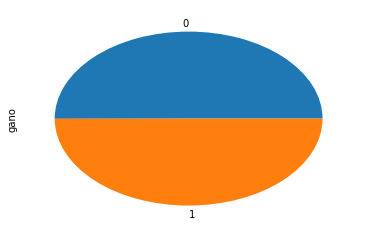

In [5]:
df.gano.value_counts().plot.pie()

In [6]:
train, not_train = train_test_split(df, test_size=0.4)
validation, test = train_test_split(not_train, test_size=0.5)

### Funciones útiles

In [7]:
INPUTS_COLUMNS = [
    "posicion_a_orthodox",
    "posicion_a_southpaw",
    "posicion_b_orthodox",
    "posicion_b_southpaw",
    "diff_altura_a_b",
    "diff_edad_a_b",
    "diff_kos_a_b",
    "diff_ganadas_a_b",
    "diff_perdidas_a_b"
]

In [8]:
def evaluate_model(model, extract_inputs_function, extract_outputs_function, include_validation=False, nn=False):
    sets = [('train', train), ('test', test), ('validation', validation)]
    if include_validation:
        sets.append(('validation', validation))
        
    for set_name, set_data in sets:
        inputs = extract_inputs_function(set_data)
        outputs = extract_outputs_function(set_data)
        predictions = model.predict(inputs)
        if nn:
            predictions = np.around(predictions)
        
        print(set_name, '#' * 80)
        
        # print metrics
        
        print('Accuracy:', accuracy_score(outputs, predictions))
        print()
        
        # plot confussion matrix
        
        plt.figure(figsize=(3,4))
        
        plt.xticks([0, 1], ['perdió', 'ganó'], rotation=45)
        plt.yticks([0, 1], ['perdió', 'ganó'])
        plt.xlabel('Predicted class')
        plt.ylabel('True class')

        plt.title(set_name)

        plt.imshow(
            confusion_matrix(outputs, predictions), 
            cmap=plt.cm.Blues, 
            interpolation='nearest',
        )

        plt.show()

In [9]:
def search_k_evaluate_model(model, extract_inputs_function, extract_outputs_function):
    accuracy = {}
    sets = [('train', train), ('test', test), ('validation', validation)]
        
    for set_name, set_data in sets:
        inputs = extract_inputs_function(set_data)
        outputs = extract_outputs_function(set_data)
        predictions = model.predict(inputs)
        accuracy[set_name] = accuracy_score(outputs, predictions)
    
    return accuracy    

### Regresión Logística

In [14]:
def lr_extract_inputs(df):
    return df[INPUTS_COLUMNS].values.astype(np.float64)

def lr_extract_outputs(df):
    return df.gano.values

In [18]:
lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=30, solver='liblinear')),
])

In [19]:
lr_model.fit(
    lr_extract_inputs(train),
    lr_extract_outputs(train),
)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=30, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

train ################################################################################
Accuracy: 0.7679724780823438



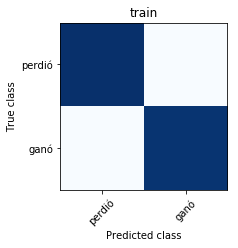

test ################################################################################
Accuracy: 0.776416539050536



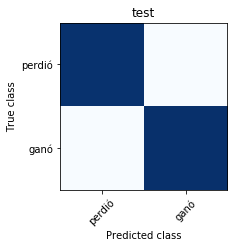

validation ################################################################################
Accuracy: 0.7731388999866826



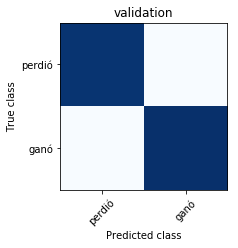

In [20]:
evaluate_model(lr_model, lr_extract_inputs, lr_extract_outputs)

#### Conclusión
Obtuvimos un 77% en validation. Lo cuál está por encima de nuestro baseline (50%) y se considera aceptable.


### KNN, encontrando un K óptimo

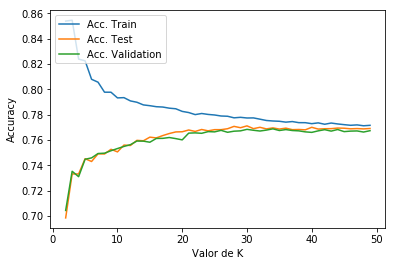

In [21]:
y_train_accuracy = []
y_test_accuracy = []
y_validation_accuracy = []
x_k = []

for i in list(range(2, 50)):
    K = i
    x_k.append(K)
    knn_model = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=K)),
    ])
    knn_model.fit(
        lr_extract_inputs(train),
        lr_extract_outputs(train),
    )
    results = search_k_evaluate_model(knn_model, lr_extract_inputs, lr_extract_outputs)
    y_train_accuracy.append(results["train"])
    y_test_accuracy.append(results["test"])
    y_validation_accuracy.append(results["validation"])

plt.plot(x_k, y_train_accuracy)
plt.plot(x_k, y_test_accuracy)
plt.plot(x_k, y_validation_accuracy)
plt.legend(['Acc. Train', 'Acc. Test', 'Acc. Validation'], loc='upper left')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")
plt.show()


train ################################################################################
Accuracy: 0.7747863722117412



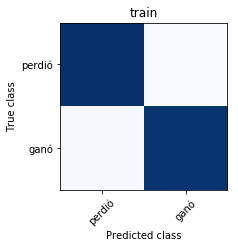

test ################################################################################
Accuracy: 0.7686264065517012



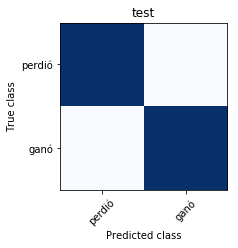

validation ################################################################################
Accuracy: 0.7674790251697963



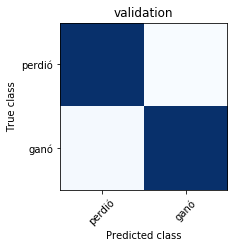

In [23]:
K = 35
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=K)),
])
knn_model.fit(
    lr_extract_inputs(train),
    lr_extract_outputs(train),
)
evaluate_model(knn_model, lr_extract_inputs, lr_extract_outputs)

Con éste modelo obtuvimos 76% de accuracy en validation, lo cual consideramos válido ya que se encuentra por encima del baseline.
Seguramente no puede lograr un mejor resultado que regresión logística ya que las features de los datos no permiten una separación clara de los mismos.

### Redes neuronales

In [25]:
model = Sequential([   
    Dense(64, input_shape=(len(INPUTS_COLUMNS), )),
    Activation('tanh'),
    Dense(32),
    Activation('relu'),
    Dropout(0.25),
    Dense(16),
    Activation('tanh'),
    Dropout(0.3),
    Dense(1),
    Activation('sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',],
)

In [26]:
history = model.fit(
    lr_extract_inputs(train), 
    lr_extract_outputs(train),
    epochs=250,
    batch_size=128,
    validation_data=(
        lr_extract_inputs(test),
        lr_extract_outputs(test),
    )
)

Train on 45055 samples, validate on 15019 samples
Epoch 1/250
45055/45055 [==============================] - 1s 28us/step - loss: 0.5197 - acc: 0.7480 - val_loss: 0.4727 - val_acc: 0.7788
Epoch 2/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4882 - acc: 0.7711 - val_loss: 0.4709 - val_acc: 0.7805
Epoch 3/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4851 - acc: 0.7718 - val_loss: 0.4682 - val_acc: 0.7829
Epoch 4/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4808 - acc: 0.7747 - val_loss: 0.4688 - val_acc: 0.7815
Epoch 5/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4801 - acc: 0.7748 - val_loss: 0.4675 - val_acc: 0.7821
Epoch 6/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4787 - acc: 0.7764 - val_loss: 0.4679 - val_acc: 0.7790
Epoch 7/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4775 - acc: 0.7775 - val_loss: 0.4674 - 

45055/45055 [==============================] - 1s 20us/step - loss: 0.4636 - acc: 0.7836 - val_loss: 0.4698 - val_acc: 0.7817
Epoch 60/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4649 - acc: 0.7848 - val_loss: 0.4674 - val_acc: 0.7823
Epoch 61/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4649 - acc: 0.7829 - val_loss: 0.4680 - val_acc: 0.7821
Epoch 62/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4636 - acc: 0.7846 - val_loss: 0.4708 - val_acc: 0.7795
Epoch 63/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4632 - acc: 0.7846 - val_loss: 0.4687 - val_acc: 0.7834
Epoch 64/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4641 - acc: 0.7847 - val_loss: 0.4688 - val_acc: 0.7833
Epoch 65/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4635 - acc: 0.7856 - val_loss: 0.4685 - val_acc: 0.7831
Epoch 66/250
45055/45055 [==============

Epoch 118/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4580 - acc: 0.7887 - val_loss: 0.4716 - val_acc: 0.7809
Epoch 119/250
45055/45055 [==============================] - 1s 21us/step - loss: 0.4559 - acc: 0.7894 - val_loss: 0.4728 - val_acc: 0.7807
Epoch 120/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4575 - acc: 0.7887 - val_loss: 0.4727 - val_acc: 0.7788
Epoch 121/250
45055/45055 [==============================] - 1s 21us/step - loss: 0.4578 - acc: 0.7886 - val_loss: 0.4734 - val_acc: 0.7795
Epoch 122/250
45055/45055 [==============================] - 1s 21us/step - loss: 0.4567 - acc: 0.7895 - val_loss: 0.4726 - val_acc: 0.7817
Epoch 123/250
45055/45055 [==============================] - 1s 21us/step - loss: 0.4571 - acc: 0.7891 - val_loss: 0.4725 - val_acc: 0.7799
Epoch 124/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4566 - acc: 0.7899 - val_loss: 0.4732 - val_acc: 0.7765
Epoch 125/250
45055/

45055/45055 [==============================] - 1s 20us/step - loss: 0.4512 - acc: 0.7927 - val_loss: 0.4772 - val_acc: 0.7771
Epoch 177/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4524 - acc: 0.7908 - val_loss: 0.4774 - val_acc: 0.7776
Epoch 178/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4528 - acc: 0.7931 - val_loss: 0.4769 - val_acc: 0.7792
Epoch 179/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4517 - acc: 0.7924 - val_loss: 0.4773 - val_acc: 0.7783
Epoch 180/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4513 - acc: 0.7937 - val_loss: 0.4783 - val_acc: 0.7770
Epoch 181/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4506 - acc: 0.7929 - val_loss: 0.4764 - val_acc: 0.7797
Epoch 182/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4521 - acc: 0.7931 - val_loss: 0.4773 - val_acc: 0.7762
Epoch 183/250
45055/45055 [=======

45055/45055 [==============================] - 1s 19us/step - loss: 0.4478 - acc: 0.7961 - val_loss: 0.4781 - val_acc: 0.7779
Epoch 235/250
45055/45055 [==============================] - 1s 19us/step - loss: 0.4480 - acc: 0.7950 - val_loss: 0.4769 - val_acc: 0.7798
Epoch 236/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4473 - acc: 0.7954 - val_loss: 0.4798 - val_acc: 0.7771
Epoch 237/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4476 - acc: 0.7951 - val_loss: 0.4815 - val_acc: 0.7795
Epoch 238/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4487 - acc: 0.7946 - val_loss: 0.4789 - val_acc: 0.7764
Epoch 239/250
45055/45055 [==============================] - 1s 20us/step - loss: 0.4474 - acc: 0.7947 - val_loss: 0.4810 - val_acc: 0.7767
Epoch 240/250
45055/45055 [==============================] - 1s 21us/step - loss: 0.4490 - acc: 0.7958 - val_loss: 0.4785 - val_acc: 0.7761
Epoch 241/250
45055/45055 [=======

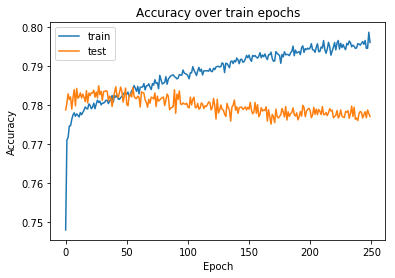

In [27]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

train ################################################################################
Accuracy: 0.802907557429808



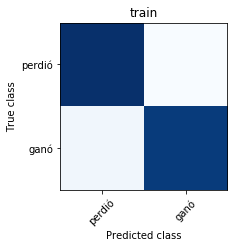

test ################################################################################
Accuracy: 0.7771489446700846



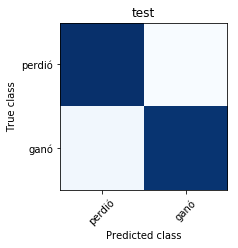

validation ################################################################################
Accuracy: 0.7791317086163271



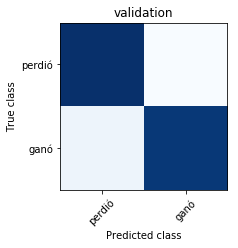

In [28]:
evaluate_model(model, lr_extract_inputs, lr_extract_outputs, nn=True)

El modelo de red neuronal arroja un accuracy que varia entre 75% y 77%. Esto lo observamos probando varios modelos y alternativas en las funciones de activación y capas extras.
Es un resultado aceptable ya que se encuentra por encima del baseline y además es lo que venimos logrando con el resto de los modelos.

### ¿Qué le decimos a nuestro cliente?
Los accuracy en todos los modelos son casi iguales. Por tanto, nos vamos a dejar llevar por la performance del algoritmo y así podríamos llegar a abaratar costos de hw y procesamiento.
Vamos a quedarnos con el algoritmo de <b>regresión logística</b> ya que es el más simple de todos y anda bastante bien.
A nuestro cliente vamos a darle el valor de accuracy del conjunto de validation con la salvedad de que vamos a generar X cantidad de predicciones y vamos a sacar un promedio de las mismas.

In [29]:
def customer_metric(iterations=10):
    accuracy_history = []
    for i in list(range(0, iterations)):
        outputs = lr_extract_outputs(validation)
        predictions = lr_model.predict(lr_extract_inputs(validation))
        accuracy_history.append(accuracy_score(outputs, predictions))
    
    return sum(accuracy_history)/len(accuracy_history)
    

In [34]:
print("Metrica para el cliente: {}%".format(customer_metric()))

Metrica para el cliente: 0.7731388999866827%
